In [6]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np


In [7]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [8]:
tf.config.list_physical_devices('GPU')
data_dir = 'data' 

In [9]:
import cv2
import imghdr

In [10]:
for i in os.listdir(data_dir):
    print(i)

Galaxies
Nebulae


In [11]:
data_dir = 'MASTERRR' 
os.listdir(os.path.join(data_dir,'MASTERGALS'))
#to loop through every single image in the folder!

['Autosave (2).jpg',
 'Autosave (3).jpg',
 'Autosave.jpg',
 'Autosave001.jpg',
 'Autosave_1.jpg',
 'DSC_0389 (2).jpg',
 'DSC_0389.jpg',
 'DSC_0390 (2).jpg',
 'DSC_0390.jpg',
 'DSC_0391 (2).jpg',
 'DSC_0391.jpg',
 'DSC_0392 (2).jpg',
 'DSC_0392.jpg',
 'DSC_0393 (2).jpg',
 'DSC_0393.jpg',
 'DSC_0394 (2).jpg',
 'DSC_0394.jpg',
 'DSC_0395 (2).jpg',
 'DSC_0395.jpg',
 'DSC_0396 (2).jpg',
 'DSC_0396.jpg',
 'DSC_0397 (2).jpg',
 'DSC_0397.jpg',
 'DSC_0398 (2).jpg',
 'DSC_0398.jpg',
 'DSC_0399 (2).jpg',
 'DSC_0399.jpg',
 'DSC_0400 (2).jpg',
 'DSC_0400.jpg',
 'DSC_0401 (2).jpg',
 'DSC_0401.jpg',
 'DSC_0402 (2).jpg',
 'DSC_0402.jpg',
 'DSC_0403 (2).jpg',
 'DSC_0403.jpg',
 'DSC_0404 (2).jpg',
 'DSC_0404.jpg',
 'DSC_0405 (2).jpg',
 'DSC_0405.jpg',
 'DSC_0406 (2).jpg',
 'DSC_0406.jpg',
 'DSC_0407 (2).jpg',
 'DSC_0407.jpg',
 'DSC_0408 (2).jpg',
 'DSC_0408.jpg',
 'DSC_0409 (2).jpg',
 'DSC_0409.jpg',
 'DSC_0410 (2).jpg',
 'DSC_0410.jpg',
 'DSC_0411 (2).jpg',
 'DSC_0411.jpg',
 'DSC_0412 (2).jpg',
 'DSC_0

In [12]:
image_exts = ['jpeg','jpg', 'bmp', 'png','nef']


In [13]:
def remove_ds_store_files(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file == '.DS_Store':
                file_path = os.path.join(root, file)
                try:
                    os.remove(file_path)
                    print(f'Removed: {file_path}')
                except Exception as e:
                    print(f'Error removing {file_path}: {e}')

# Example usage:
directory_path = data_dir
remove_ds_store_files(directory_path)

In [14]:
img = cv2.imread(os.path.join('MASTERRR','MASTERNEBS','DSC_0022.jpg'))

In [15]:
img.shape

(2776, 4416, 3)

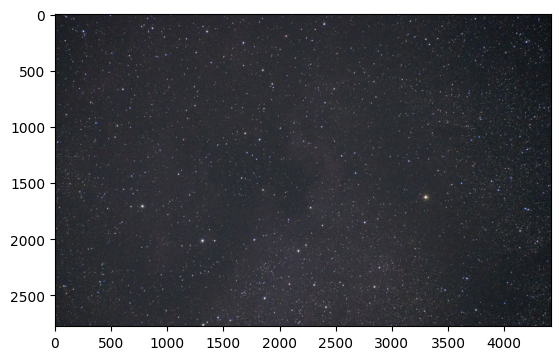

In [16]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
#cv2.cvtColor(img_Name,cv2.COLOR_BGR2RGB) to convert the BGR to RGB channel to color the image display properly.

In [17]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

LOAD DATA ----

In [18]:
#4321_1234
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None) -> 'DatasetV2'>

In [19]:
data = tf.keras.utils.image_dataset_from_directory('MASTERRR')

Found 934 files belonging to 2 classes.


In [20]:
data_iterator = data.as_numpy_iterator()
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x0000024D4D2A98E0>)

In [21]:
#get another batch from the iterator
batch = data_iterator.next()

In [22]:
#images represented as numpy arrays. WOOOOOH FINALLY
batch[1].shape

(32,)

In [23]:
batch[1]
#CLASS 1=Nebulae
#Class 0 =Galaixes

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0])

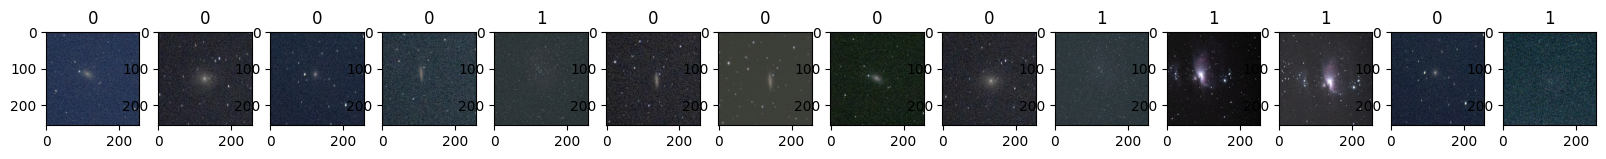

In [24]:
fig,ax = plt.subplots(ncols = 14,figsize=(20,20))
for idx, img in enumerate(batch[0][:14]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [25]:
scaled = batch[0] / 255
scaled.max()
#default batch size is 32 because of memory allocations.

1.0

PREPROCESSING

In [26]:
data = data.map(lambda x,y: (x/255,y))

In [27]:
scaled_itr = data.as_numpy_iterator()

In [28]:
batch = scaled_itr.next()

In [29]:
print("MIN of batch",min(batch[1]))
print("MAX of batch",max(batch[1]))

MIN of batch 0
MAX of batch 1


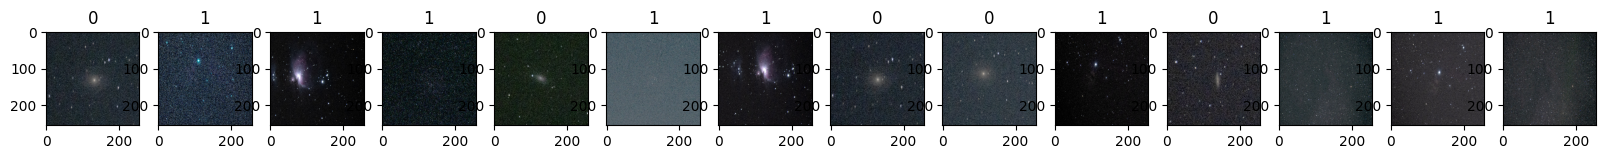

In [30]:
fig,ax = plt.subplots(ncols = 14,figsize=(20,20))
for idx, img in enumerate(batch[0][:14]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

Train Test Split

In [31]:
len(data)

30

In [32]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.2)

In [33]:
print(train_size)
print(test_size)
print(val_size)

21
6
6


In [34]:
#take and skip method - defines how much data we are going to take
#skip 
train = data.take(train_size)
val = data.skip(val_size).take(val_size)
test = data.skip(train_size).take(test_size)


DEEP MODEL

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout


In [36]:
model = Sequential()

# Each neuron in a convolutional layer is connected only to a small region of the input, known as the receptive field, rather than the entire input. This design mimics the local connectivity observed in the human visual cortex and is efficient for processing high-dimensional data like images

In [37]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
#applying more activations makes the function more powerful;
#some other powerful activation function is called the sigmoid activation funciton.
#we basically pass the value from the model sample into the activation function

#the dense layer are the fully single output points - which will represent sigmoid activation 0 or 1

In [39]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
logdir = 'logs'

In [42]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [43]:
hist = model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.5873 - loss: 0.6895 - val_accuracy: 0.7500 - val_loss: 0.5103
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8045 - loss: 0.4301 - val_accuracy: 0.8698 - val_loss: 0.3425
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.9004 - loss: 0.2559 - val_accuracy: 0.9635 - val_loss: 0.1322
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9898 - loss: 0.0725 - val_accuracy: 0.9948 - val_loss: 0.0398
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9853 - loss: 0.0358 - val_accuracy: 0.9948 - val_loss: 0.0105
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.9988 - loss: 0.0071 - val_accuracy: 1.0000 - val_loss: 0.0036
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 1.0000 - loss: 8.5851e-04 - val_accuracy: 1.0000 - val_l

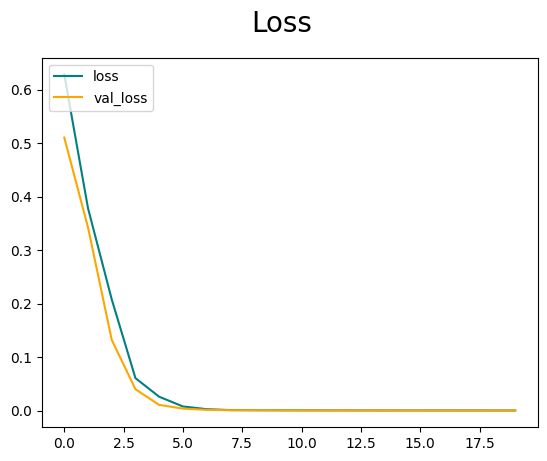

In [44]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

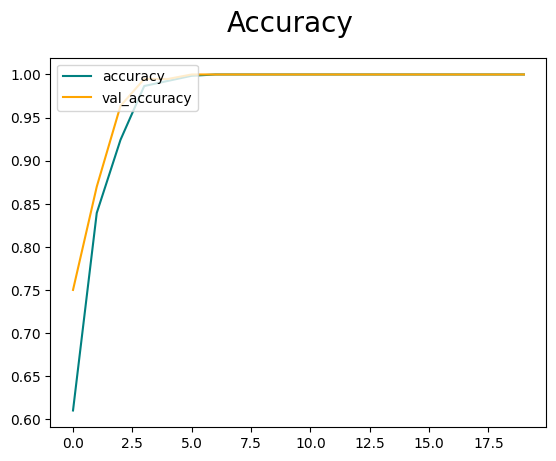

In [45]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

EVALUATTION

In [46]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [47]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [48]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


In [49]:
print("Precision",pre.result().numpy(), "Recall",re.result().numpy(), "Accuracy",acc.result().numpy())

Precision 1.0 Recall 1.0 Accuracy 1.0


TEST

In [50]:
import cv2

=VICTORY.

<!-- 0.0 = Galaxy
1.0 = Nebula. -->


In [51]:
#my deep learning model failed for now. this is the beginning though.
#29/8/24 its working

MODEL EVALUATION


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


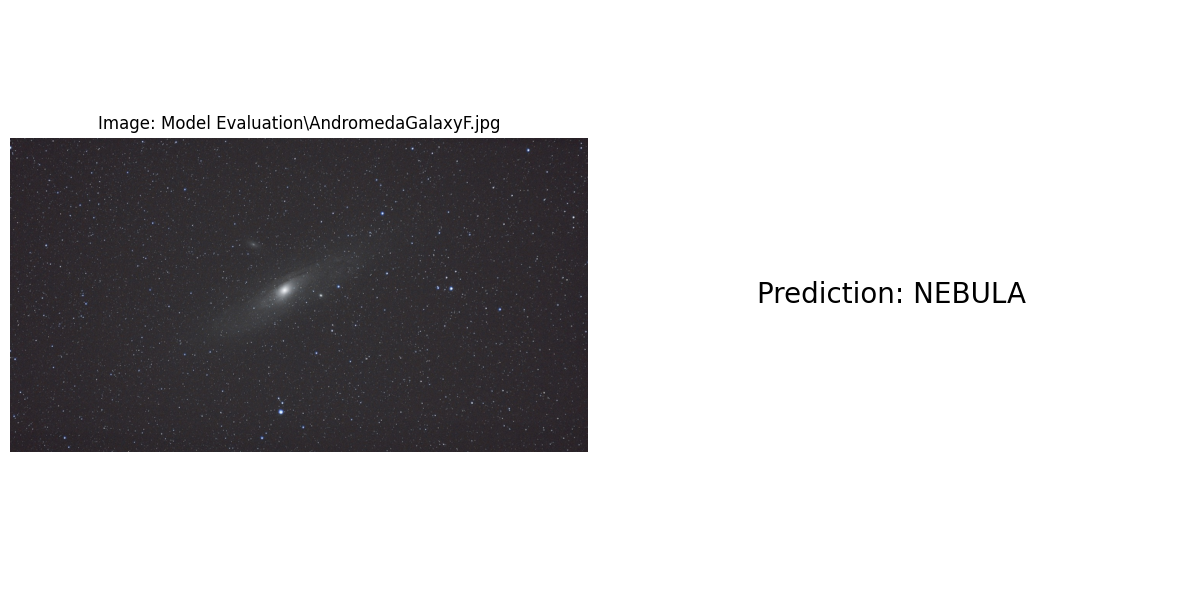

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


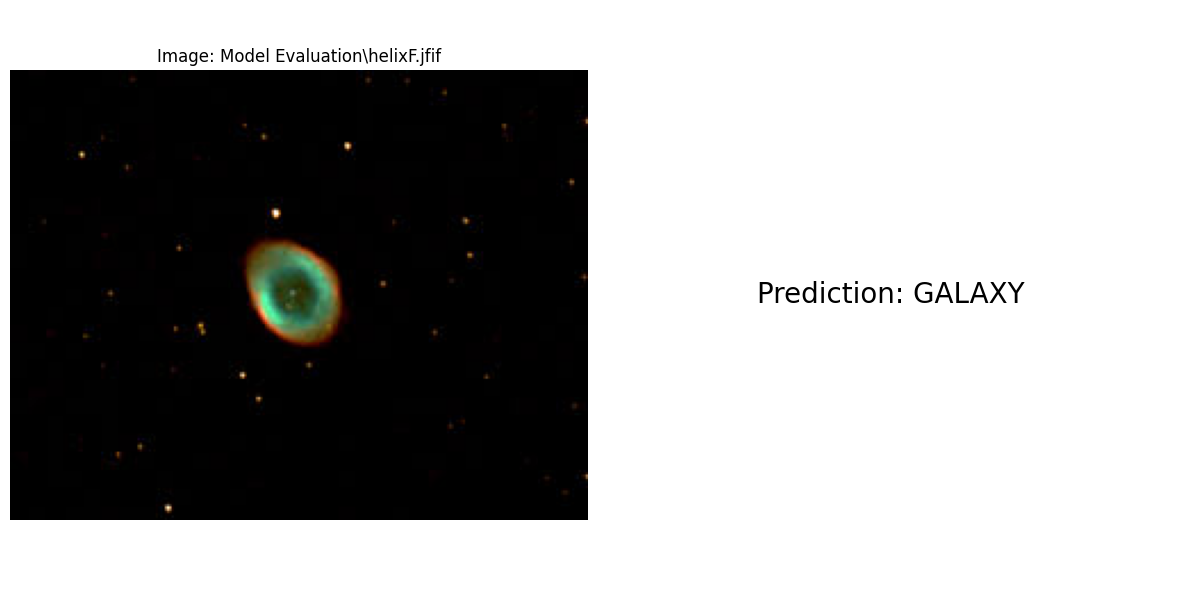

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


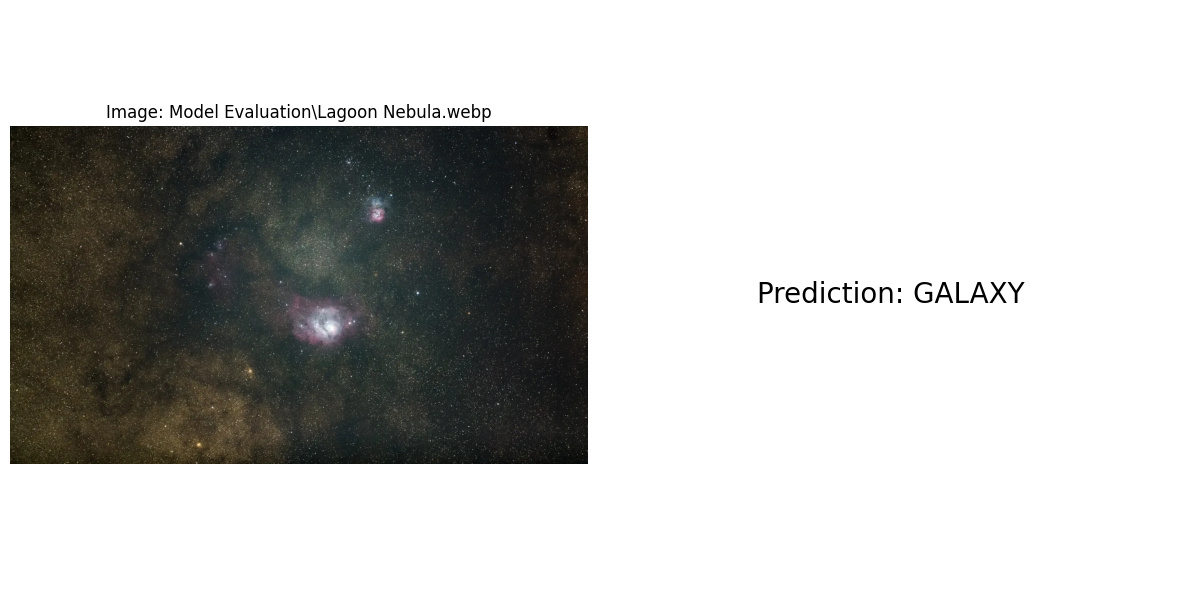

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


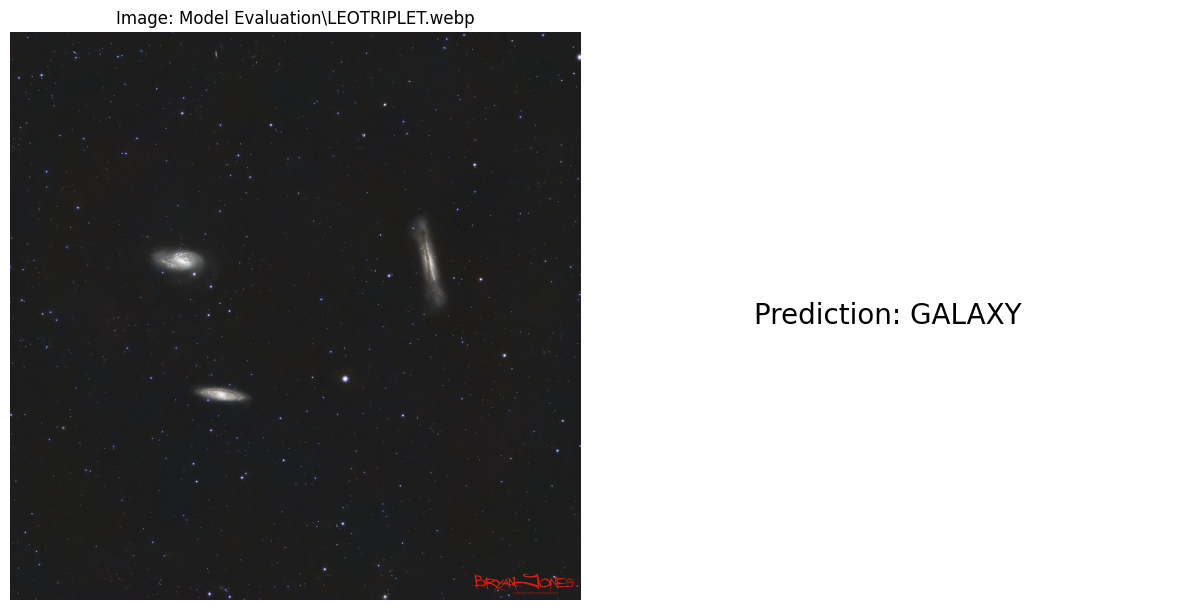

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


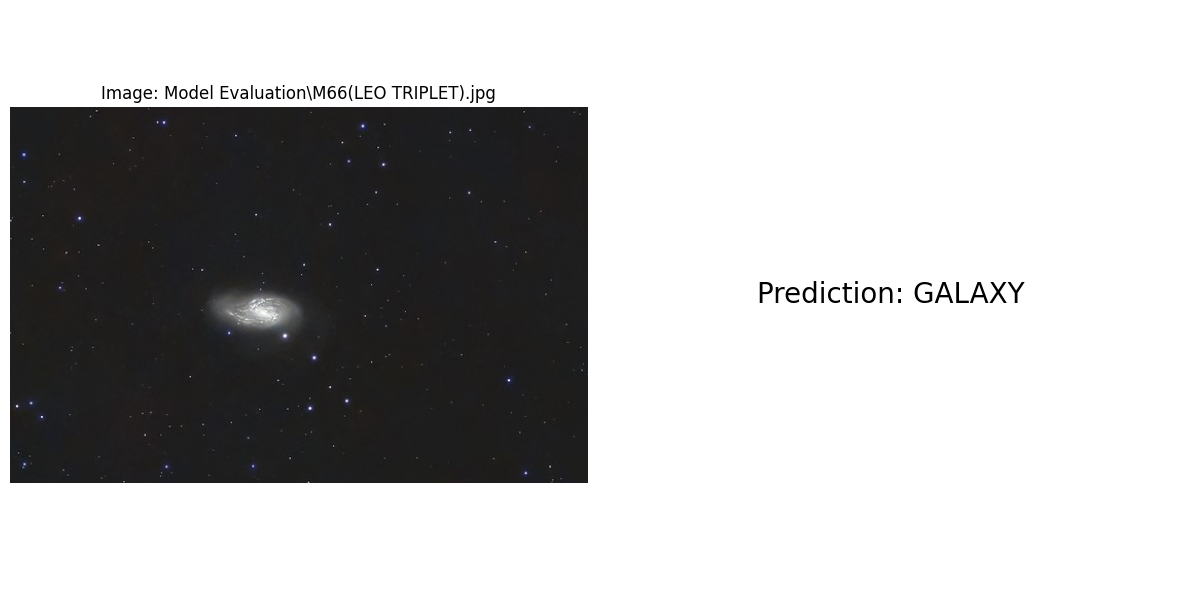

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


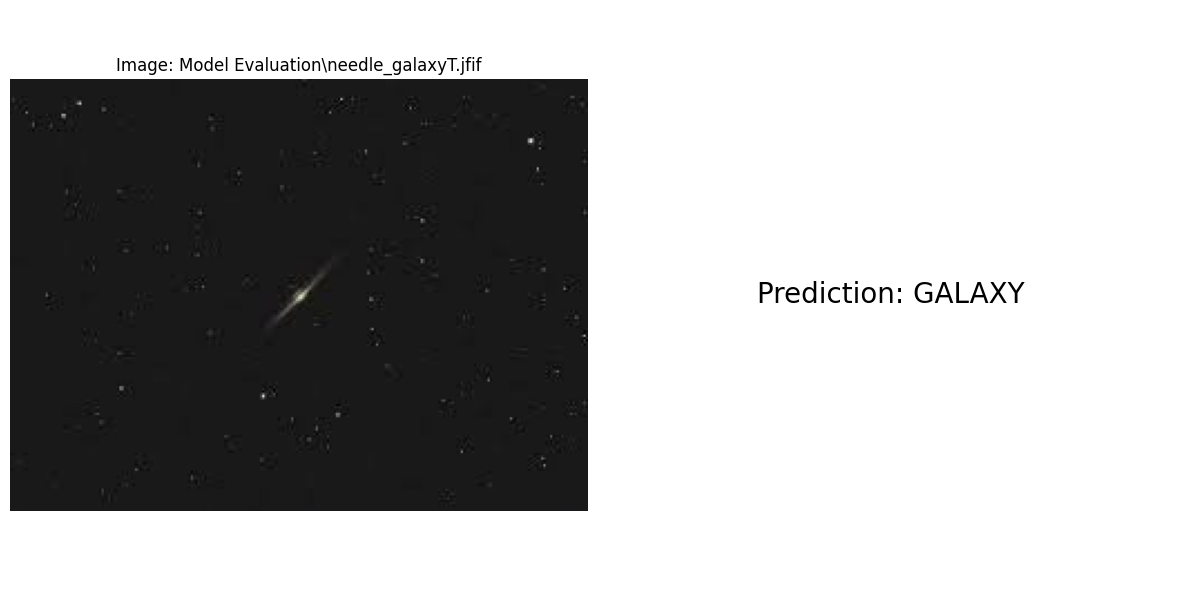

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


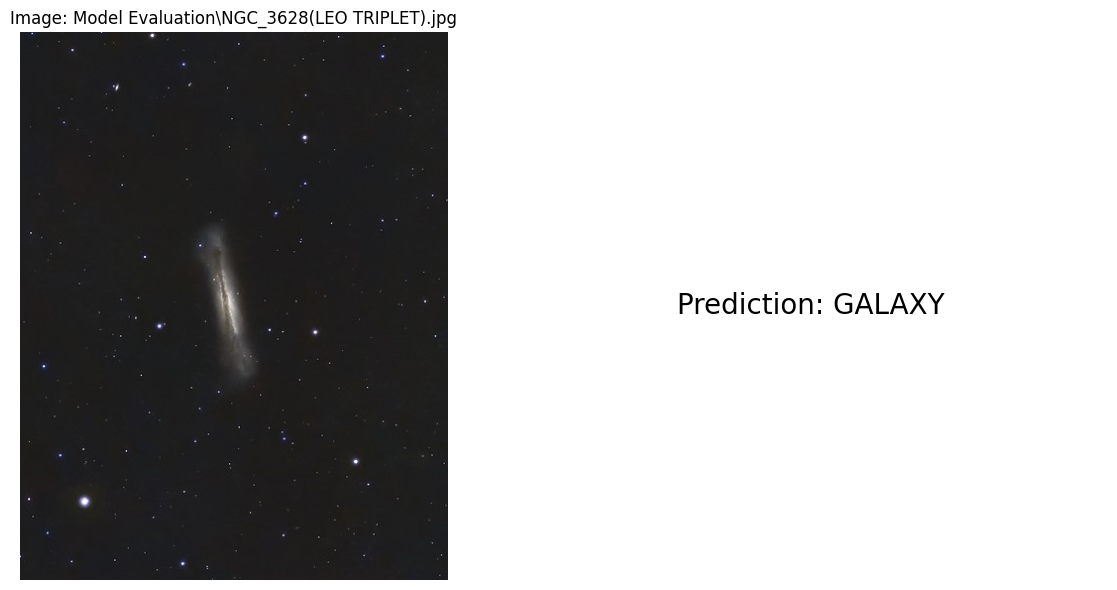

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


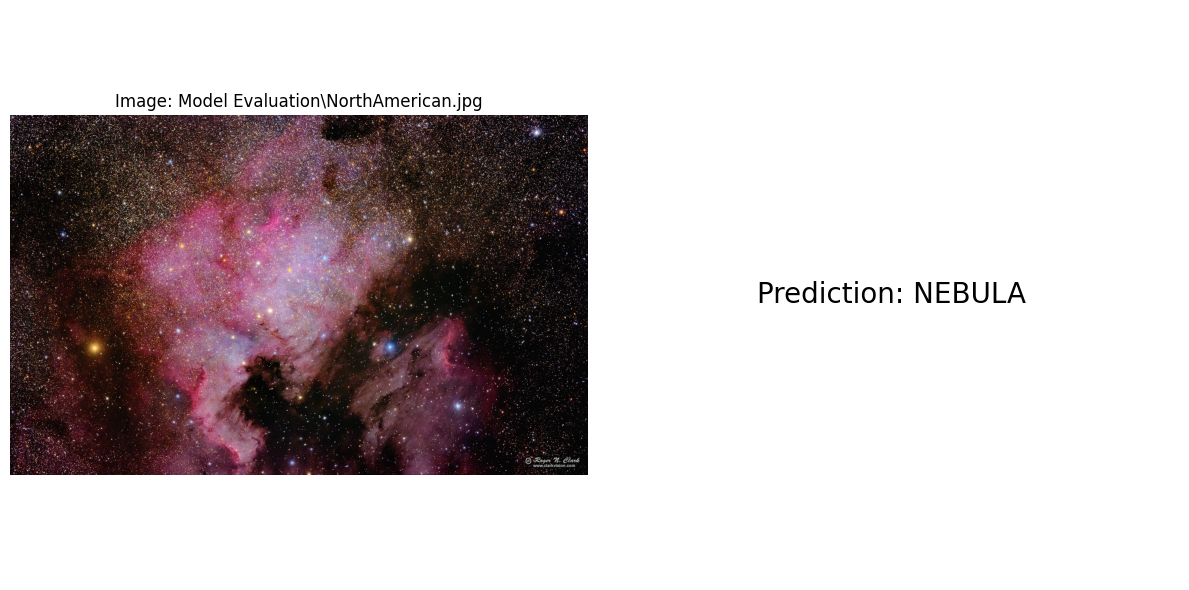

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


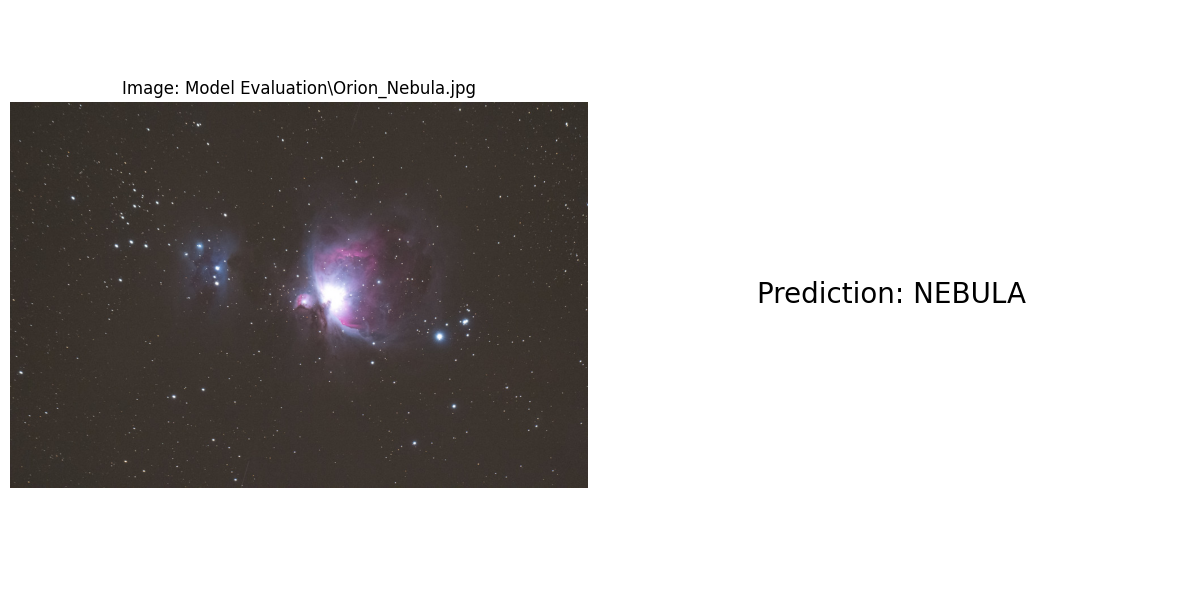

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


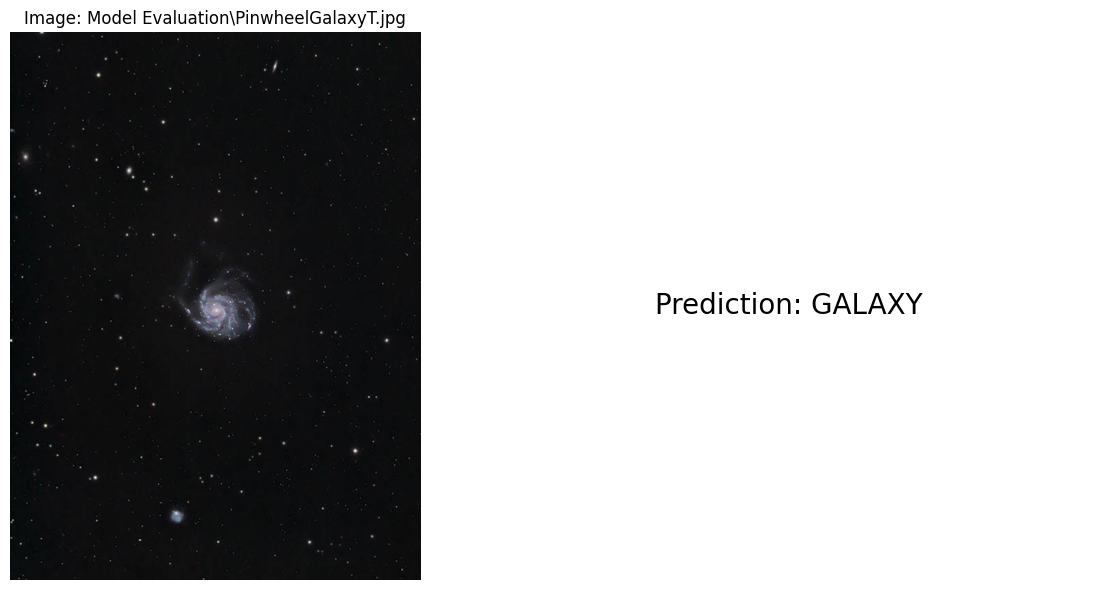

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


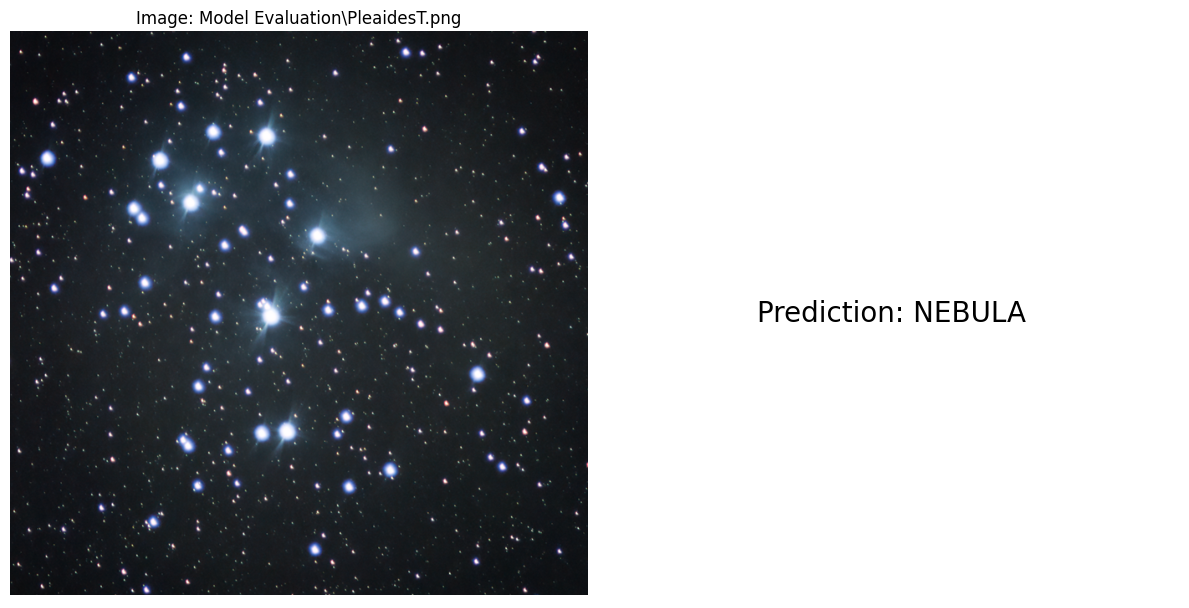

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


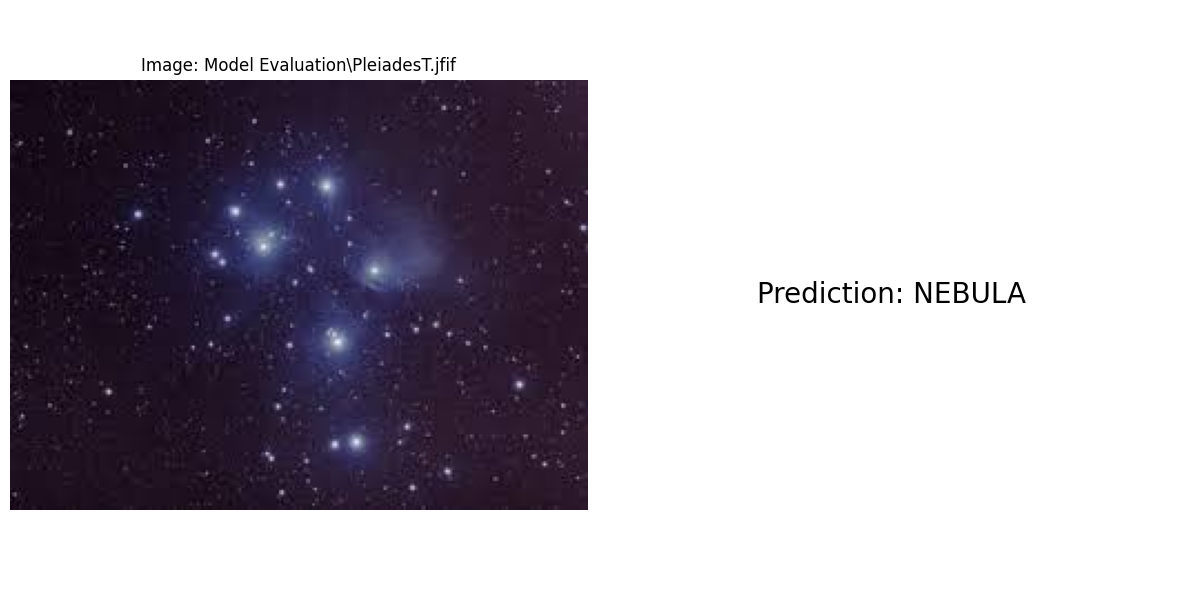

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


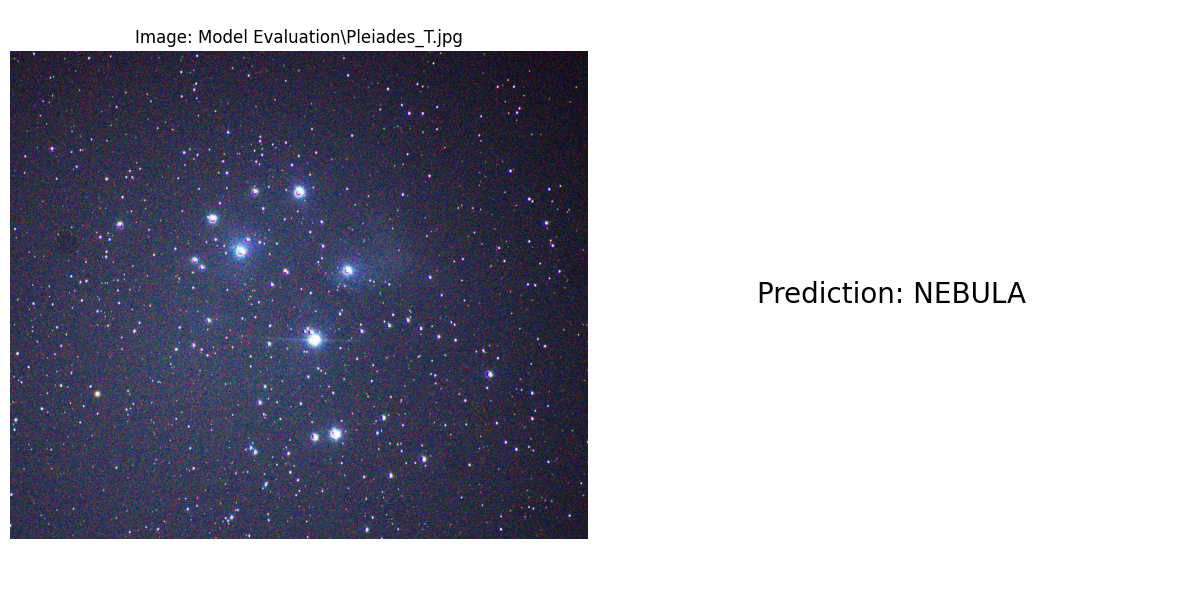

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


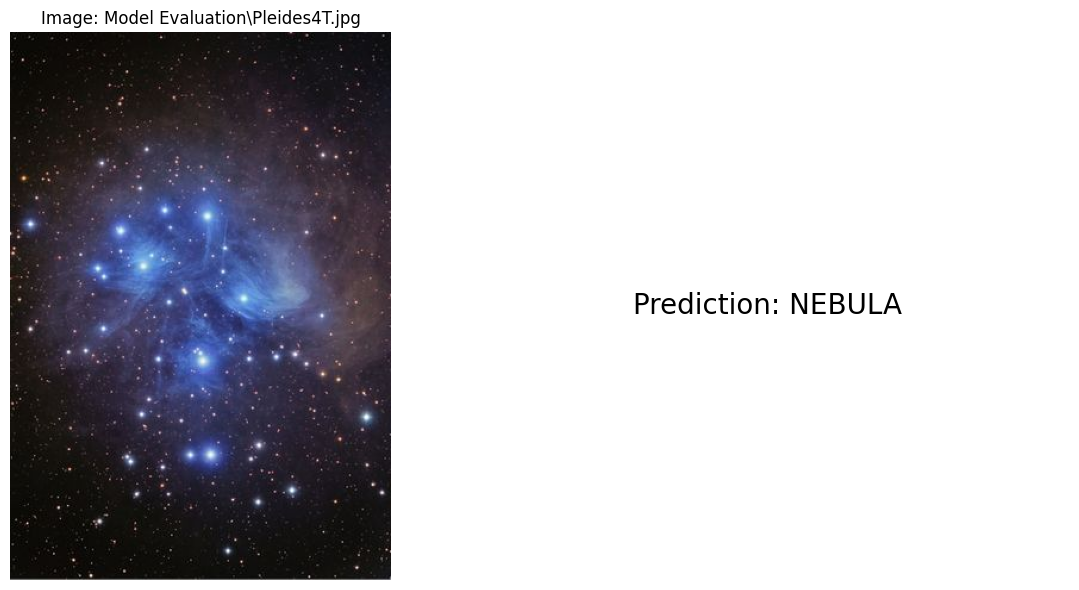

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


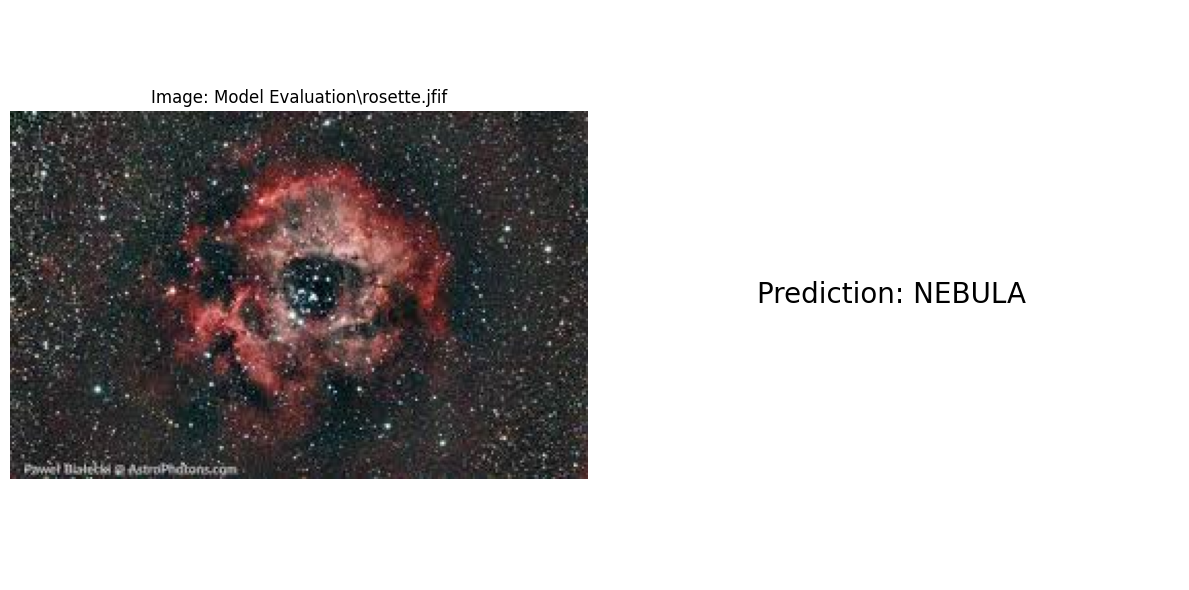

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


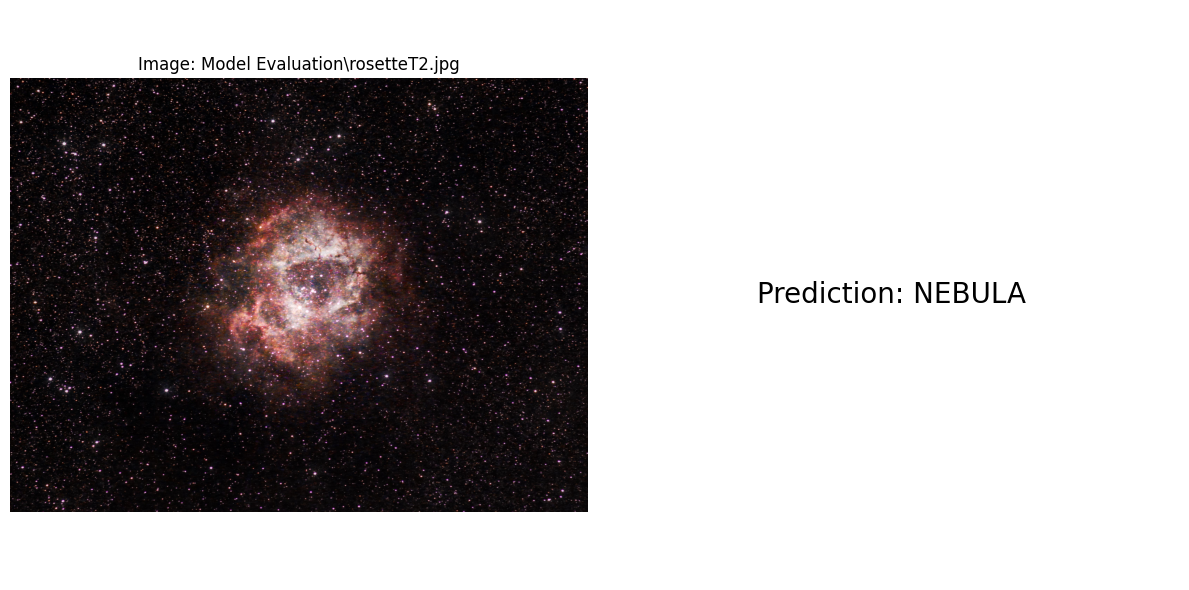

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


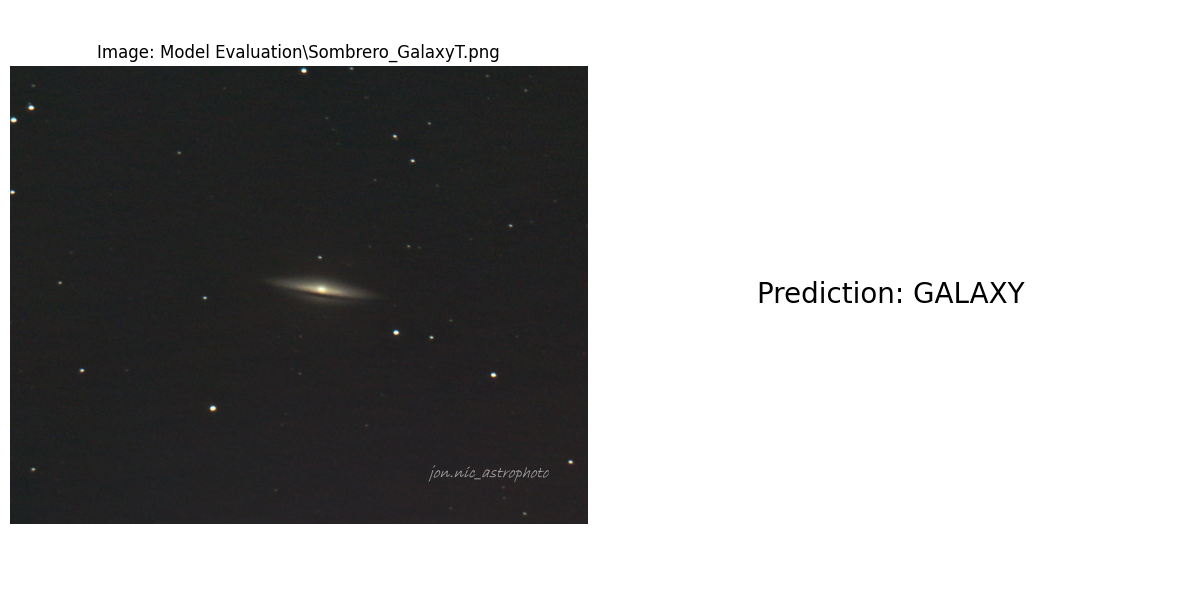

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


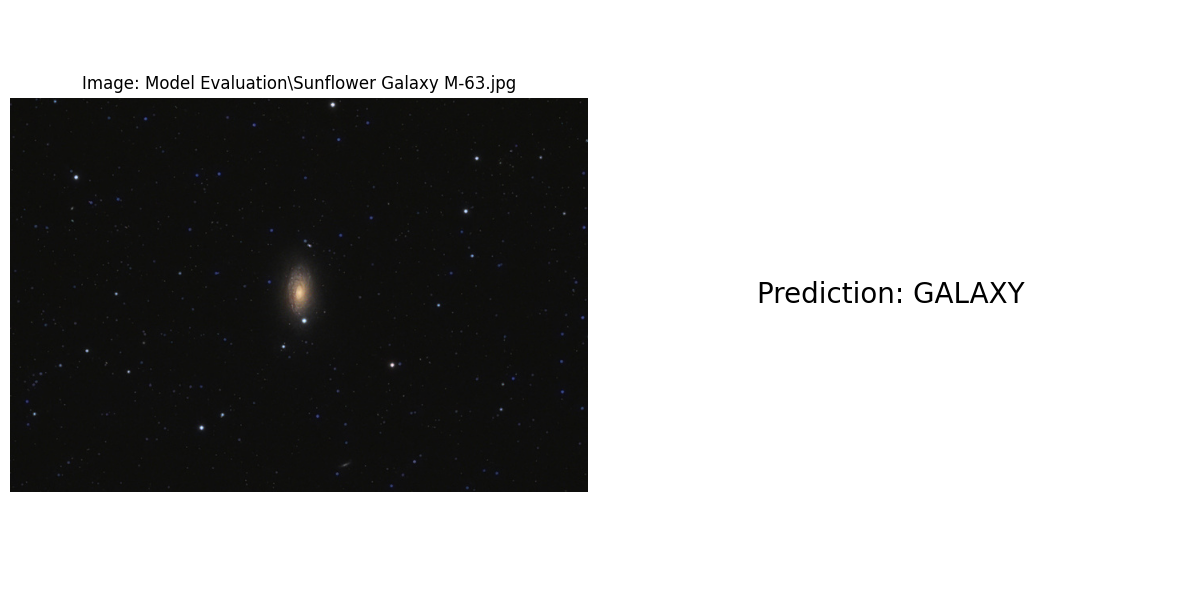

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


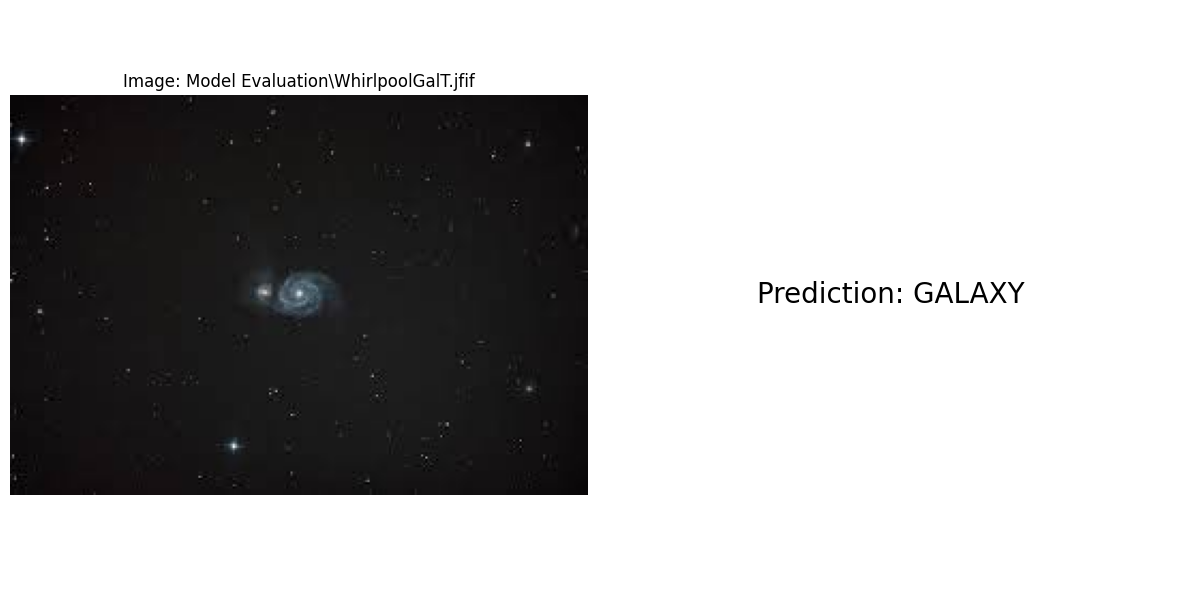

In [52]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Path to your folder containing images
folder_path = "Model Evaluation"

# List of all image files in the folder (change to your local path)
image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith(('.jpg', '.jfif', '.png', '.webp'))]

# Load your pre-trained model
# model = tf.keras.models.load_model('path_to_your_model.h5')  # Update this to your model's path

for image_file in image_files:
    # Read the image
    img = cv2.imread(image_file)
    
    # Resize the image to the required input shape (256, 256)
    resize = tf.image.resize(img, (256, 256))
    
    # Expand dimensions to match the input shape of the model
    img_array = np.expand_dims(resize / 255, 0)

    # Predict using the model
    yhat = model.predict(img_array)

    # Print and store the classification
    if yhat > 0.5:
        prediction = "NEBULA"
    else:
        prediction = "GALAXY"
    
    # Create a figure with 2 subplots: one for the image, one for the prediction
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize for the desired layout
    
    # Display the image on the left subplot
    ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[0].set_title(f"Image: {image_file}")
    ax[0].axis('off')  # Hide the axis for better visualization
    
    # Show the prediction as text on the right subplot
    ax[1].text(0.5, 0.5, f"Prediction: {prediction}", fontsize=20, ha='center', va='center')
    ax[1].axis('off')  # Hide the axis for the prediction text
    
    # Adjust the layout to fill the screen horizontally
    plt.tight_layout()
    
    # Display the plot
    plt.show()
